#### Problem statement : Analysis on brand new cars in different cities.

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot  as plt, seaborn as sns

In [2]:
import plotly.express as px

In [3]:
cdf = pd.read_csv('cars.csv')

In [4]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           626 non-null    int64  
 1   carName              626 non-null    object 
 2   carPrice             626 non-null    float64
 3   seater               626 non-null    int64  
 4   city                 626 non-null    object 
 5   variantTransmission  626 non-null    object 
 6   fuelType             626 non-null    object 
 7   modelType            607 non-null    object 
 8   numberOfvariants     599 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 44.1+ KB


#### missing value handling

##### replaced missing value in numberOfvariants column with value 1.

In [4]:
cdf['numberOfvariants']= cdf['numberOfvariants'].fillna(1)

In [5]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           626 non-null    int64  
 1   carName              626 non-null    object 
 2   carPrice             626 non-null    float64
 3   seater               626 non-null    int64  
 4   city                 626 non-null    object 
 5   variantTransmission  626 non-null    object 
 6   fuelType             626 non-null    object 
 7   modelType            607 non-null    object 
 8   numberOfvariants     626 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 44.1+ KB


#### dropping the rows which contains null value

In [6]:
df = cdf.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 625
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           607 non-null    int64  
 1   carName              607 non-null    object 
 2   carPrice             607 non-null    float64
 3   seater               607 non-null    int64  
 4   city                 607 non-null    object 
 5   variantTransmission  607 non-null    object 
 6   fuelType             607 non-null    object 
 7   modelType            607 non-null    object 
 8   numberOfvariants     607 non-null    float64
dtypes: float64(2), int64(2), object(5)
memory usage: 47.4+ KB


#### converting object column to category type

In [9]:
df.loc[:, 'numberOfvariants'] = df['numberOfvariants'].astype('int')

In [11]:
cols = df.select_dtypes(include='object').columns

for col in cols:
        df.loc[:,col] = df[col].astype('category')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 607 entries, 0 to 625
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0           607 non-null    int64   
 1   carName              607 non-null    category
 2   carPrice             607 non-null    float64 
 3   seater               607 non-null    int64   
 4   city                 607 non-null    category
 5   variantTransmission  607 non-null    category
 6   fuelType             607 non-null    category
 7   modelType            607 non-null    category
 8   numberOfvariants     607 non-null    int32   
dtypes: category(5), float64(1), int32(1), int64(2)
memory usage: 28.1 KB


#### dropping unnamed 0 column from dataframe

In [14]:
df = df.copy()

In [15]:
df.drop(['Unnamed: 0'], axis=1, inplace = True)

#### Outliers checking and handling

In [36]:
df.describe(include='all')

carName    carPrice      seater       city variantTransmission  \
count            607  607.000000  607.000000        607                 607   
unique            85         NaN         NaN         11                   2   
top     Tata Harrier         NaN         NaN  Bangalore              Manual   
freq              11         NaN         NaN         56                 440   
mean             NaN   16.864975    5.512356        NaN                 NaN   
std              NaN   10.938472    0.948907        NaN                 NaN   
min              NaN    4.980000    4.000000        NaN                 NaN   
25%              NaN    9.310000    5.000000        NaN                 NaN   
50%              NaN   13.670000    5.000000        NaN                 NaN   
75%              NaN   19.495000    6.000000        NaN                 NaN   
max              NaN   55.740000    8.000000        NaN                 NaN   

       fuelType modelType  numberOfvariants  
count       607       607        607.000000  
unique        4         9               NaN  
top      Petrol      SUV5               NaN  
freq        408       272               NaN  
mean        NaN       NaN         11.670511  
std         NaN       NaN          9.018143  
min         NaN       NaN          1.000000  
25%         NaN       NaN          6.000000  
50%         NaN       NaN          9.000000  
75%         NaN       NaN         17.000000  
max         NaN       NaN         49.000000

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carPrice'>

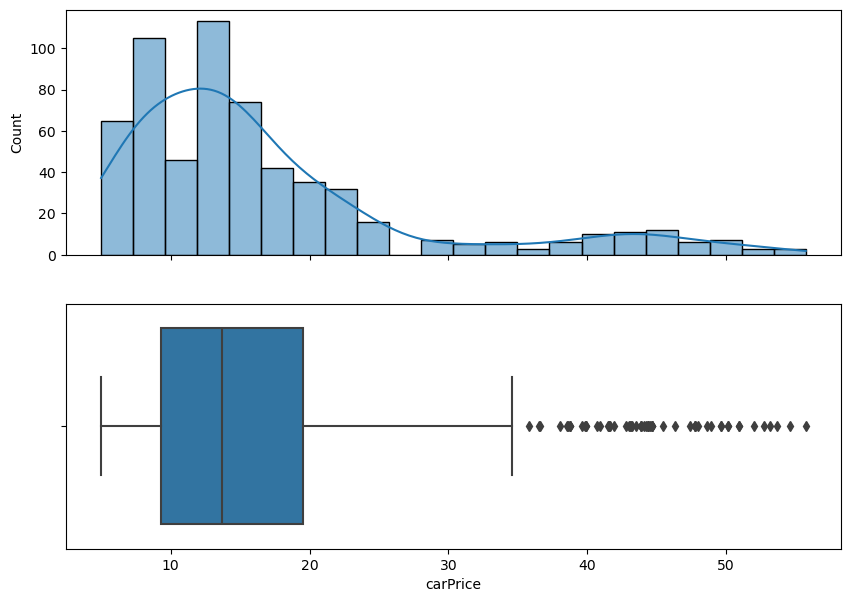

In [44]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (10, 7))

sns.histplot(x = df['carPrice'], kde = True, ax = ax[0])
sns.boxplot(x = df['carPrice'], ax = ax[1])

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='numberOfvariants'>

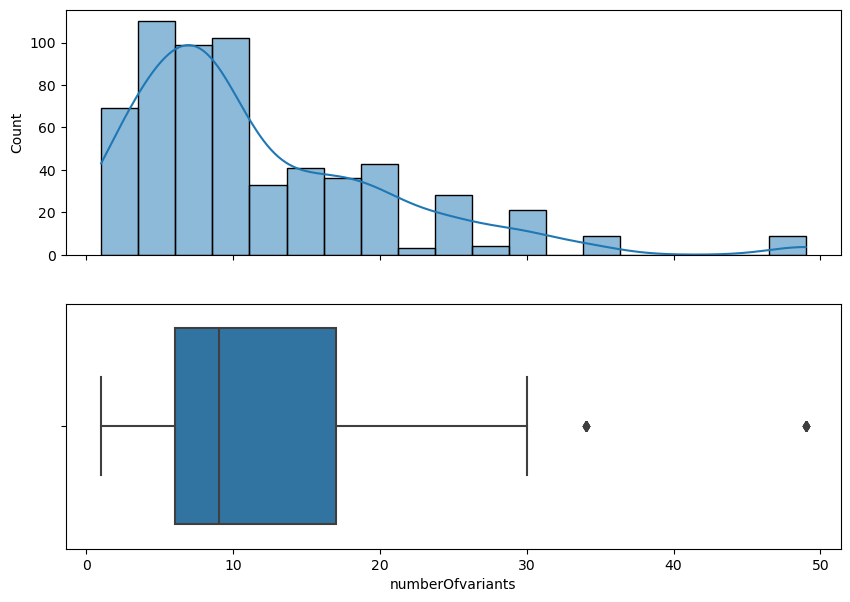

In [45]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (10, 7))

sns.histplot(x = df['numberOfvariants'], kde = True, ax = ax[0])
sns.boxplot(x = df['numberOfvariants'], ax = ax[1])

<Axes: xlabel='seater'>

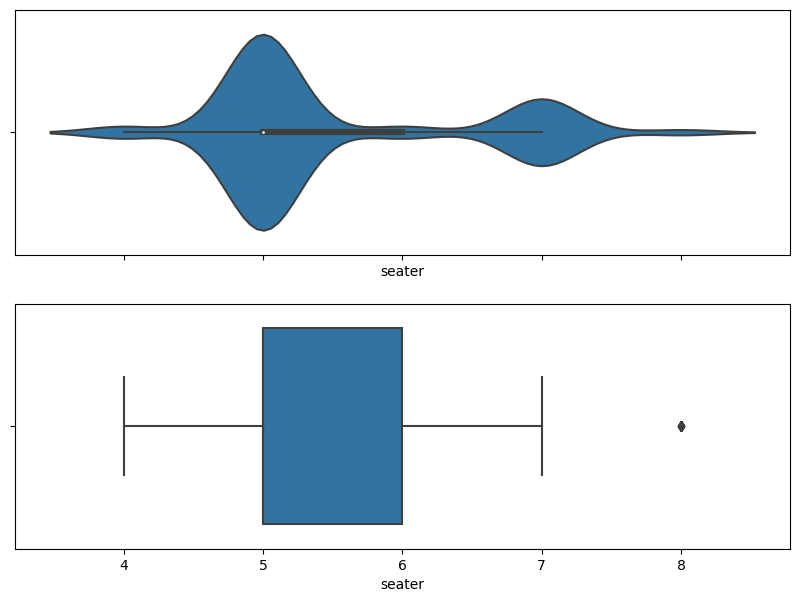

In [48]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (10, 7))

sns.violinplot(x = df['seater'], kde = True, ax = ax[0])
sns.boxplot(x = df['seater'], ax = ax[1])

#### handling outliers in carprice column

In [18]:
c = 1.5
q1, q3 = df['carPrice'].quantile(0.25), df['carPrice'].quantile(0.75)
iqr = q3 - q1
lower = max(df['carPrice'].min(), q1 - c*iqr) 
upper = min(df['carPrice'].max(), q3 + c*iqr)
df1 = df[(df['carPrice'] >= lower) & (df['carPrice']<=upper)]

C:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='carPrice'>

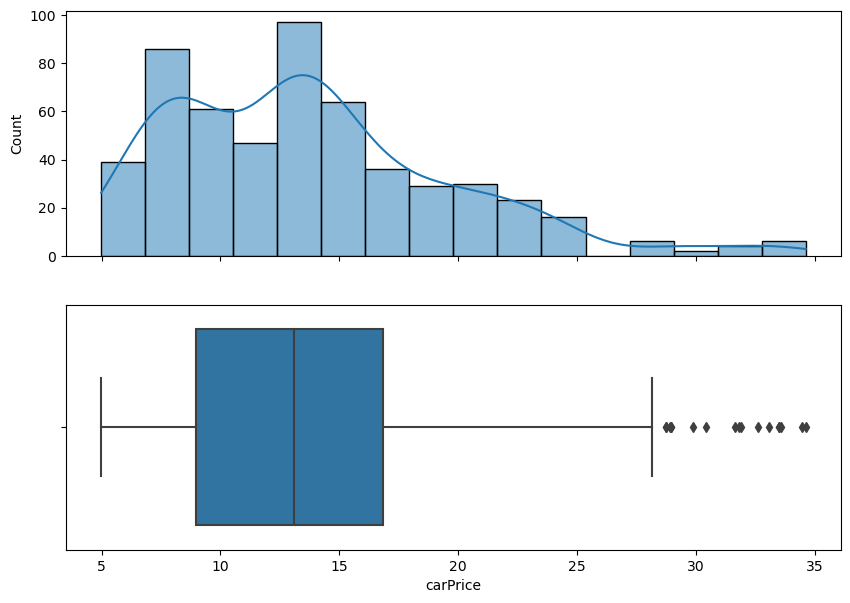

In [19]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (10, 7))

sns.histplot(x = df1['carPrice'], kde = True, ax = ax[0])
sns.boxplot(x = df1['carPrice'], ax = ax[1])

### Uni-variate analysis

### Distribution of cars

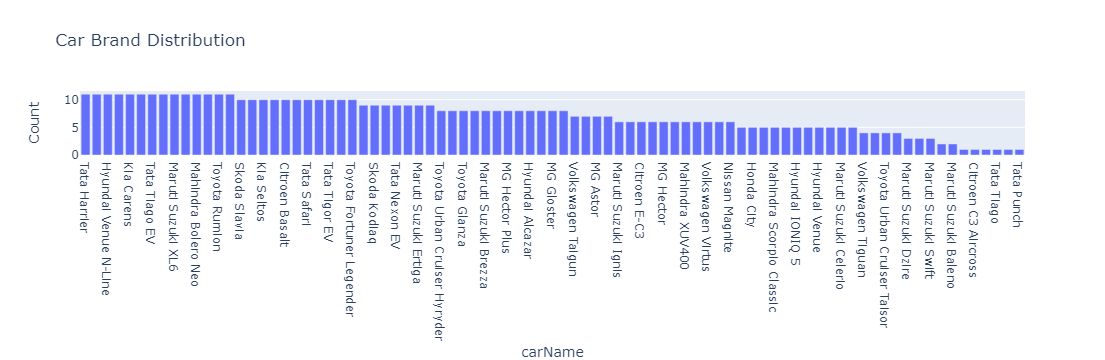

In [53]:
brand_counts = df['carName'].value_counts().reset_index()
brand_counts.columns = ['carName', 'count']

fig = px.bar(brand_counts, x='carName', y='count', title='Car Brand Distribution', labels={'brand': 'Car Name', 'count': 'Count'})

fig.show()

In [17]:
category_counts = df['variantTransmission'].value_counts()

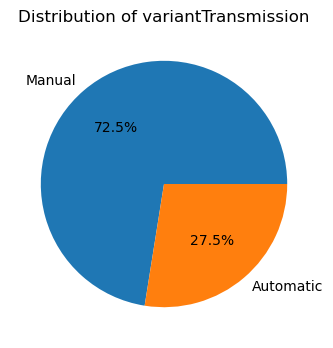

In [18]:
plt.figure(figsize=(4, 4))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.title('Distribution of variantTransmission')
plt.show()

C:\Users\bhata\AppData\Local\Temp\ipykernel_12364\2256634613.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



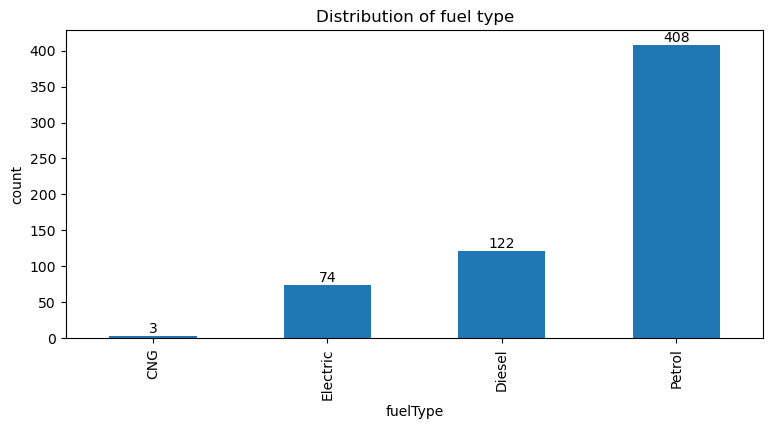

In [96]:
plt.figure(figsize=(9, 4))
plt.title('Distribution of fuel type')
barPlt = df.groupby('fuelType')['fuelType'].count().sort_values().plot(kind = 'bar', ylabel = 'count')

for i in barPlt.containers:
    barPlt.bar_label(i, label_type='edge')

plt.show()

C:\Users\bhata\AppData\Local\Temp\ipykernel_12364\2345628301.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



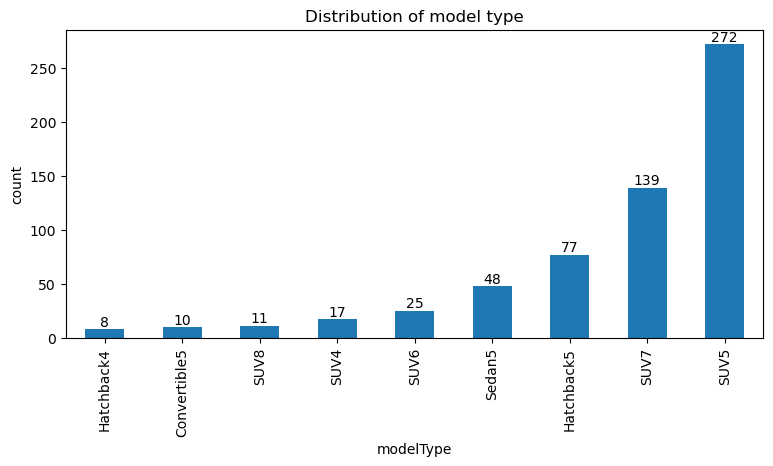

In [98]:
plt.figure(figsize=(9, 4))
plt.title('Distribution of model type')
barPlt = df.groupby('modelType')['modelType'].count().sort_values().plot(kind = 'bar', ylabel = 'count')

for i in barPlt.containers:
    barPlt.bar_label(i, label_type='edge')

plt.show()

#### Distribution of car based on seater

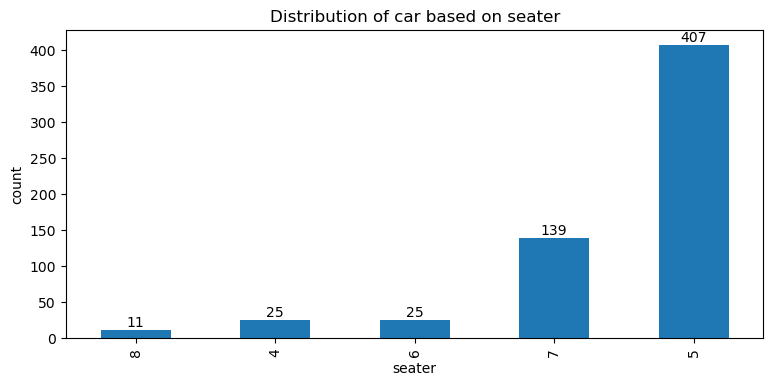

In [102]:
plt.figure(figsize=(9, 4))
plt.title('Distribution of car based on seater')
barPlt = df.groupby('seater')['seater'].count().sort_values().plot(kind = 'bar', ylabel = 'count')

for i in barPlt.containers:
    barPlt.bar_label(i, label_type='edge')

plt.show()

#### 10 lowest price car

In [99]:
p = df.sort_values(by = ['carPrice'], ascending = True)
p.head(10)

carName  carPrice  seater       city variantTransmission  \
351  Maruti Suzuki Alto K10      4.98       5    Gurgaon              Manual   
234  Maruti Suzuki Alto K10      4.98       5  Faridabad              Manual   
181  Maruti Suzuki Alto K10      5.04       5      Delhi              Manual   
520  Maruti Suzuki Alto K10      5.09       5      Noida              Manual   
293  Maruti Suzuki Alto K10      5.09       5  Ghaziabad              Manual   
263  Maruti Suzuki S-Presso      5.22       5  Faridabad              Manual   
35   Maruti Suzuki Alto K10      5.23       5  Ahmedabad              Manual   
553  Maruti Suzuki S-Presso      5.34       5      Noida              Manual   
325  Maruti Suzuki S-Presso      5.34       5  Ghaziabad              Manual   
98   Maruti Suzuki Alto K10      5.56       5  Bangalore              Manual   

    fuelType   modelType  numberOfvariants  
351   Petrol  Hatchback5                 7  
234   Petrol  Hatchback5                 7  
181   Petrol  Hatchback5                 7  
520   Petrol  Hatchback5                 7  
293   Petrol  Hatchback5                 7  
263   Petrol        SUV5                 7  
35    Petrol  Hatchback5                 7  
553   Petrol        SUV5                 7  
325   Petrol        SUV5                 7  
98    Petrol  Hatchback5                 6

#### 10 highest price car

In [100]:
p1 = df.sort_values(by = ['carPrice'], ascending = False)
p1.head(10)

carName  carPrice  seater       city  \
165  Toyota Fortuner Legender     55.74       7    Chennai   
108  Toyota Fortuner Legender     54.64       7  Bangalore   
612  Toyota Fortuner Legender     53.67       7       Pune   
69               Skoda Kodiaq     53.19       7  Bangalore   
507  Toyota Fortuner Legender     52.72       7     Mumbai   
220  Toyota Fortuner Legender     52.05       7      Delhi   
334  Toyota Fortuner Legender     50.97       7  Ghaziabad   
562  Toyota Fortuner Legender     50.97       7      Noida   
385  Toyota Fortuner Legender     50.17       7    Gurgaon   
277  Toyota Fortuner Legender     50.17       7  Faridabad   

    variantTransmission fuelType modelType  numberOfvariants  
165           Automatic   Diesel      SUV7                 2  
108           Automatic   Diesel      SUV7                 2  
612           Automatic   Diesel      SUV7                 2  
69            Automatic   Petrol      SUV7                 1  
507           Automatic   Diesel      SUV7                 2  
220           Automatic   Diesel      SUV7                 2  
334           Automatic   Diesel      SUV7                 2  
562           Automatic   Diesel      SUV7                 2  
385           Automatic   Diesel      SUV7                 2  
277           Automatic   Diesel      SUV7                 2

#### Bi-variate analysis

#### Minimum price of car in each city

C:\Users\bhata\AppData\Local\Temp\ipykernel_12364\139405413.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



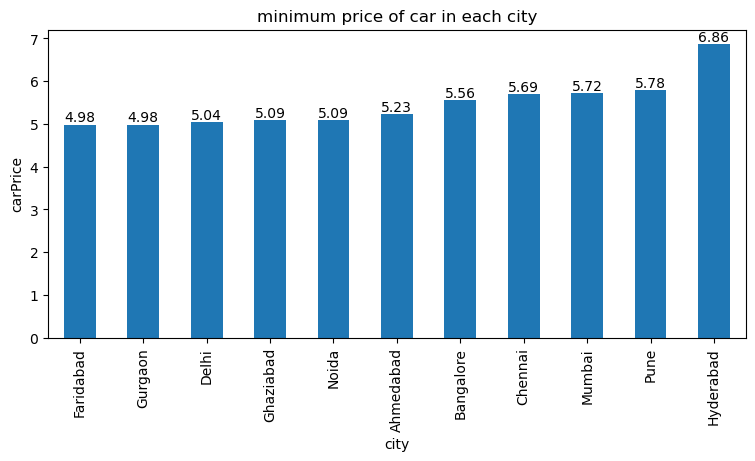

In [87]:
plt.figure(figsize=(9, 4))
plt.title('minimum price of car in each city')
barPlt = df.groupby('city')['carPrice'].min().sort_values().plot(kind = 'bar', ylabel = 'carPrice')

for i in barPlt.containers:
    barPlt.bar_label(i, label_type='edge')

plt.show()

#### Maximum price of car in each city

C:\Users\bhata\AppData\Local\Temp\ipykernel_12364\2212429885.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



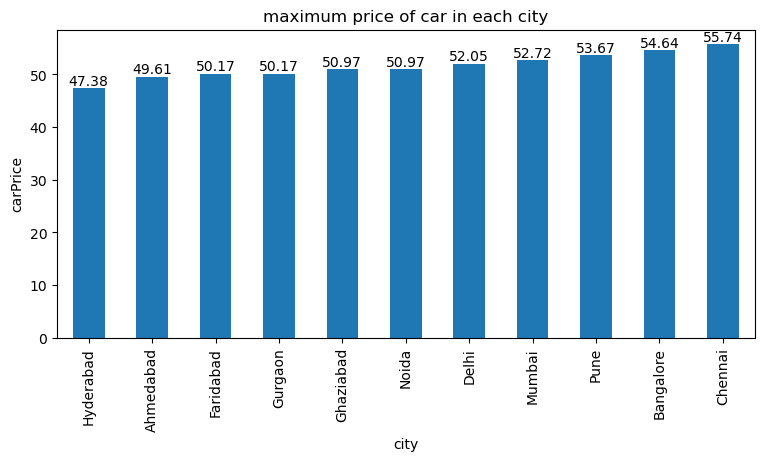

In [86]:
plt.figure(figsize=(9, 4))
plt.title('maximum price of car in each city')
barPlt = df.groupby('city')['carPrice'].max().sort_values().plot(kind = 'bar', ylabel = 'carPrice')

for i in barPlt.containers:
    barPlt.bar_label(i, label_type='edge')

plt.show()

#### how car price varies with seater

In [84]:
correlation = df['seater'].corr(df['carPrice'])
correlation

0.43598378268840937

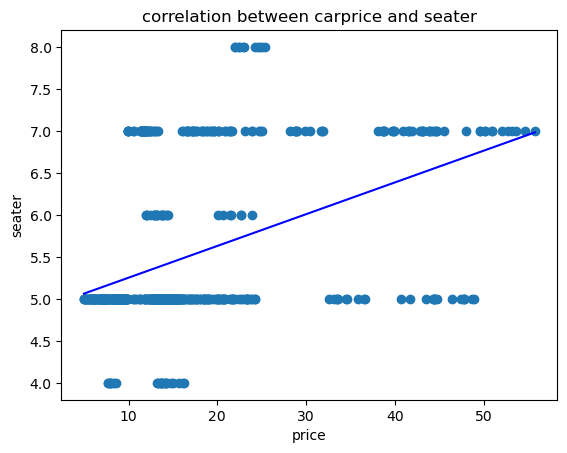

In [85]:
plt.scatter(df['carPrice'], df['seater'])
plt.title('correlation between carprice and seater') 
plt.xlabel('price')
plt.ylabel('seater')
plt.plot(np.unique(df['carPrice']), np.poly1d(np.polyfit(df['carPrice'], df['seater'], 1))
         (np.unique(df['carPrice'])), color='blue')

#### Minimum price of car for each variant Transmission

C:\Users\bhata\AppData\Local\Temp\ipykernel_12364\399857707.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



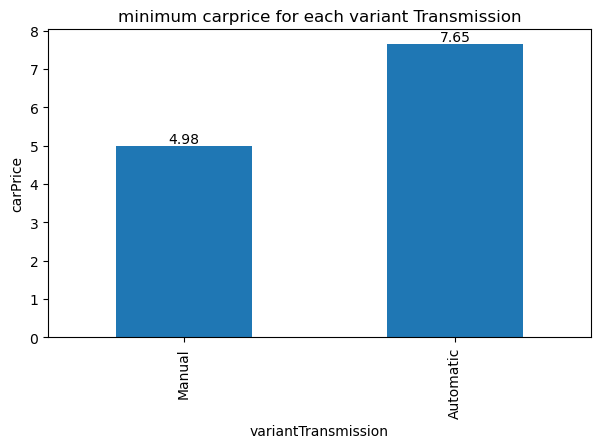

In [83]:
plt.figure(figsize=(7, 4))
plt.title('minimum carprice for each variant Transmission')
barPlt = df.groupby('variantTransmission')['carPrice'].min().sort_values().plot(kind = 'bar', ylabel = 'carPrice')

for i in barPlt.containers:
    barPlt.bar_label(i, label_type='edge')

plt.show()

#### maximum price of car for each variant Transmission

C:\Users\bhata\AppData\Local\Temp\ipykernel_12364\919887307.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



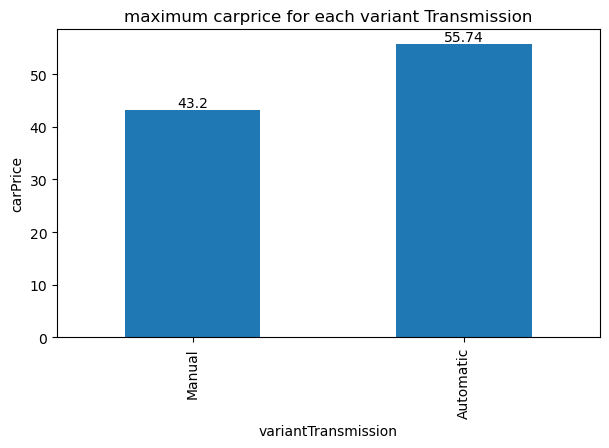

In [82]:
plt.figure(figsize=(7, 4))
plt.title('maximum carprice for each variant Transmission')
barPlt = df.groupby('variantTransmission')['carPrice'].max().sort_values().plot(kind = 'bar', ylabel = 'carPrice')

for i in barPlt.containers:
    barPlt.bar_label(i, label_type='edge')

plt.show()

#### Maximum price of car for different fueltype

C:\Users\bhata\AppData\Local\Temp\ipykernel_1728\2012567866.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



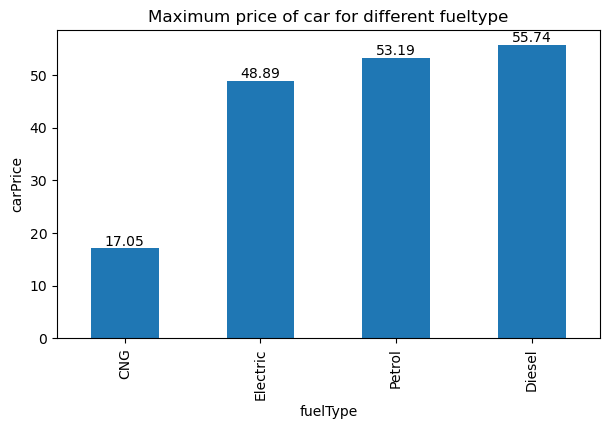

In [49]:
plt.figure(figsize=(7, 4))
plt.title('Maximum price of car for different fueltype')
barPlt = df.groupby('fuelType')['carPrice'].max().sort_values().plot(kind = 'bar', ylabel = 'carPrice')

for i in barPlt.containers:
    barPlt.bar_label(i, label_type='edge')

plt.show()

#### Minimum price of car for different fueltype

C:\Users\bhata\AppData\Local\Temp\ipykernel_12364\2933650424.py:3: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



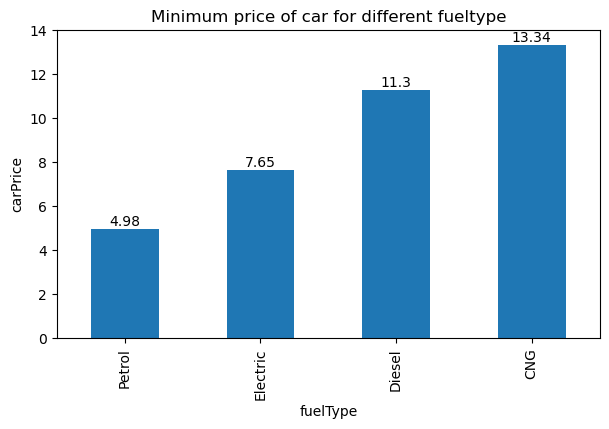

In [80]:
plt.figure(figsize=(7, 4))
plt.title('Minimum price of car for different fueltype')
barPlt = df.groupby('fuelType')['carPrice'].min().sort_values().plot(kind = 'bar', ylabel = 'carPrice')

for i in barPlt.containers:
    barPlt.bar_label(i, label_type='edge')

plt.show()

#### top 20 highest price car in different city

In [78]:
d = df.sort_values(by = 'carPrice', ascending = False)
d1 = d.head(20)

C:\anaconda\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



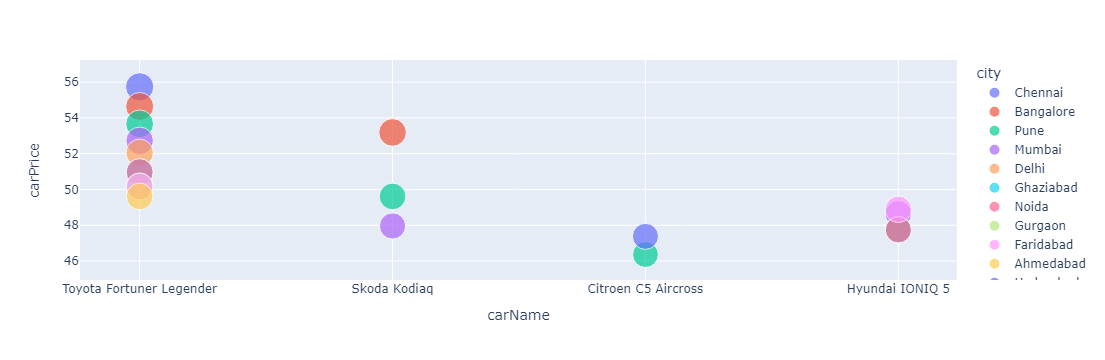

In [79]:
fig = px.scatter(d1, x = 'carName', y = 'carPrice',color='city', size='carPrice')
fig.show()

#### 50 lowest price car in different city

In [76]:
l = df.sort_values(by = 'carPrice', ascending = True)
l1 = l.head(50)

C:\anaconda\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



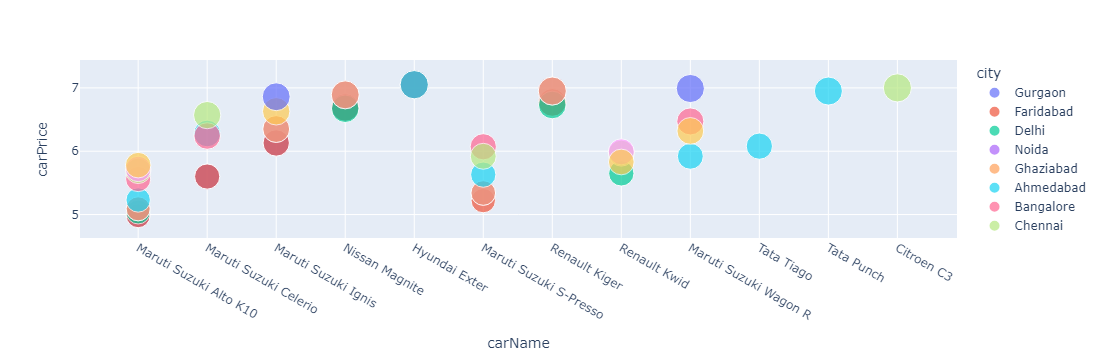

In [77]:
fig = px.scatter(l1, x = 'carName', y = 'carPrice',color='city', size='carPrice')
fig.show()

#### Creating a new column called brand which contains only the first word of the car name

In [17]:
df['brand'] = df['carName'].str.split().str[0]

In [18]:
df

carName  carPrice  seater       city  \
0                  Tata Tiago EV      8.91       5  Ahmedabad   
1                      Kia Sonet      9.12       5  Ahmedabad   
2         Maruti Suzuki S-Presso      5.63       5  Ahmedabad   
3                     Tata Tiago      6.08       5  Ahmedabad   
4                     Citroen C3      7.06       5  Ahmedabad   
..                           ...       ...     ...        ...   
621              Mahindra Bolero     11.47       7       Pune   
622         Hyundai Creta N Line     21.78       5       Pune   
623  Toyota Urban Cruiser Taisor      9.23       5       Pune   
624                Mahindra Thar     14.96       4       Pune   
625               Citroen Basalt      9.46       5       Pune   

    variantTransmission  fuelType   modelType  numberOfvariants     brand  
0             Automatic  Electric  Hatchback5                 7      Tata  
1                Manual    Petrol        SUV5                24       Kia  
2                Manual    Petrol        SUV5                 7    Maruti  
3                Manual    Petrol  Hatchback5                17      Tata  
4                Manual    Petrol        SUV5                 9   Citroen  
..                  ...       ...         ...               ...       ...  
621              Manual    Diesel        SUV7                 3  Mahindra  
622           Automatic    Petrol        SUV5                 4   Hyundai  
623              Manual    Petrol        SUV5                10    Toyota  
624              Manual    Diesel        SUV4                17  Mahindra  
625              Manual    Petrol        SUV5                 6   Citroen  

[607 rows x 9 columns]

#### Stacked bar chart of Car Names by City

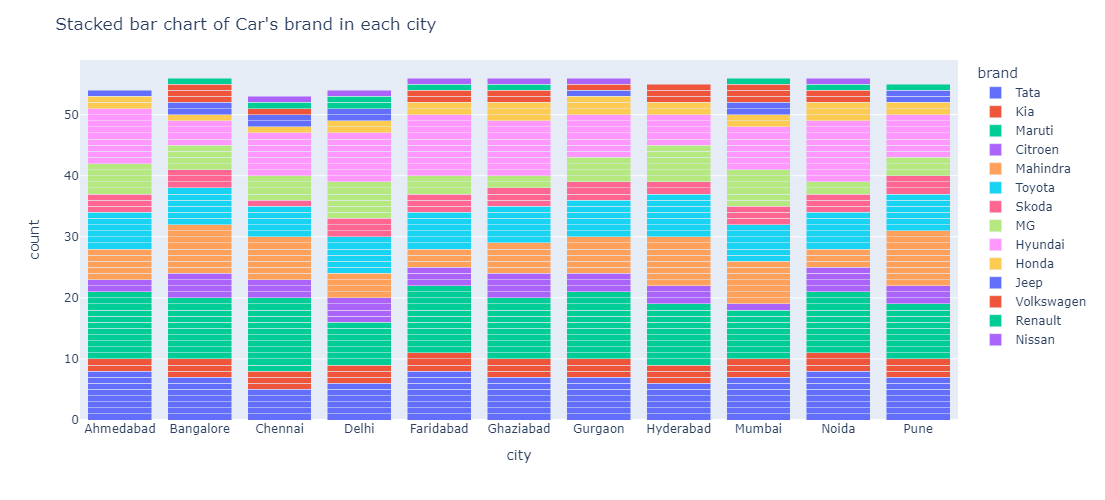

In [23]:
fig = px.bar(df, x='city', y=None, color='brand', barmode='stack')
fig.update_layout(width=1000, height=500, title="Stacked bar chart of Car's brand in each city")

fig.show()

In [16]:
df

carName  carPrice  seater       city  \
0                  Tata Tiago EV      8.91       5  Ahmedabad   
1                      Kia Sonet      9.12       5  Ahmedabad   
2         Maruti Suzuki S-Presso      5.63       5  Ahmedabad   
3                     Tata Tiago      6.08       5  Ahmedabad   
4                     Citroen C3      7.06       5  Ahmedabad   
..                           ...       ...     ...        ...   
621              Mahindra Bolero     11.47       7       Pune   
622         Hyundai Creta N Line     21.78       5       Pune   
623  Toyota Urban Cruiser Taisor      9.23       5       Pune   
624                Mahindra Thar     14.96       4       Pune   
625               Citroen Basalt      9.46       5       Pune   

    variantTransmission  fuelType   modelType  numberOfvariants  
0             Automatic  Electric  Hatchback5                 7  
1                Manual    Petrol        SUV5                24  
2                Manual    Petrol        SUV5                 7  
3                Manual    Petrol  Hatchback5                17  
4                Manual    Petrol        SUV5                 9  
..                  ...       ...         ...               ...  
621              Manual    Diesel        SUV7                 3  
622           Automatic    Petrol        SUV5                 4  
623              Manual    Petrol        SUV5                10  
624              Manual    Diesel        SUV4                17  
625              Manual    Petrol        SUV5                 6  

[607 rows x 8 columns]

#### Minimum price of car based on fuel type in each city.  

In [75]:
pd.pivot_table(data = df, values = 'carPrice',
               index = ['fuelType'],
               columns = ['city'],
               aggfunc='min')

city      Ahmedabad  Bangalore  Chennai  Delhi  Faridabad  Ghaziabad  Gurgaon  \
fuelType                                                                        
CNG           13.75      17.05    13.34    NaN        NaN        NaN      NaN   
Diesel        11.30      11.72    11.57  11.43      11.37      11.38    11.37   
Electric       7.93       9.47     8.37   8.36       7.92       8.34     7.92   
Petrol         5.23       5.56     5.69   5.04       4.98       5.09     4.98   

city      Hyderabad  Mumbai  Noida   Pune  
fuelType                                   
CNG             NaN     NaN    NaN    NaN  
Diesel        11.71   11.72  11.38  11.47  
Electric       8.18    7.72   8.34   7.65  
Petrol         6.86    5.72   5.09   5.78

#### Maximum price of car based on fuel type in each city. 

In [72]:
pd.pivot_table(data = df, values = 'carPrice',
               index = ['fuelType'],
               columns = ['city'],
               aggfunc='max')

city      Ahmedabad  Bangalore  Chennai  Delhi  Faridabad  Ghaziabad  Gurgaon  \
fuelType                                                                        
CNG           13.75      17.05    13.34    NaN        NaN        NaN      NaN   
Diesel        49.61      54.64    55.74  52.05      50.17      50.97    50.17   
Electric      21.57      18.94    21.45  47.77      48.89      47.74    15.66   
Petrol        45.47      53.19    42.76  44.69      43.85      44.64    43.85   

city      Hyderabad  Mumbai  Noida   Pune  
fuelType                                   
CNG             NaN     NaN    NaN    NaN  
Diesel        47.38   52.72  50.97  53.67  
Electric      22.87   48.64  47.74  17.12  
Petrol        44.26   47.96  44.64  49.61

#### Conclusion : The data analysis and visualizations have provided insights into regional preferences, pricing, and market demand for brand new cars across various cities.